In [17]:
import alphadb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
STOCK = 'SPY'
START_DATE = '2020-10-01'

In [11]:
bar1min = alphadb.get_close(STOCK, interval='1min', start=START_DATE).close.rename('1min bar')
bar5min = alphadb.get_close(STOCK, interval='5min', start=START_DATE).close.rename('5min bar')
bar60min = alphadb.get_close(STOCK, interval='60min', start=START_DATE).close.rename('60min bar')
bar1day = alphadb.get_close(STOCK, interval='1d', start=START_DATE, source='yahoofinance').close.rename('1day bar')

In [23]:
df = pd.concat([bar1min, bar60min, bar1day], axis=1)

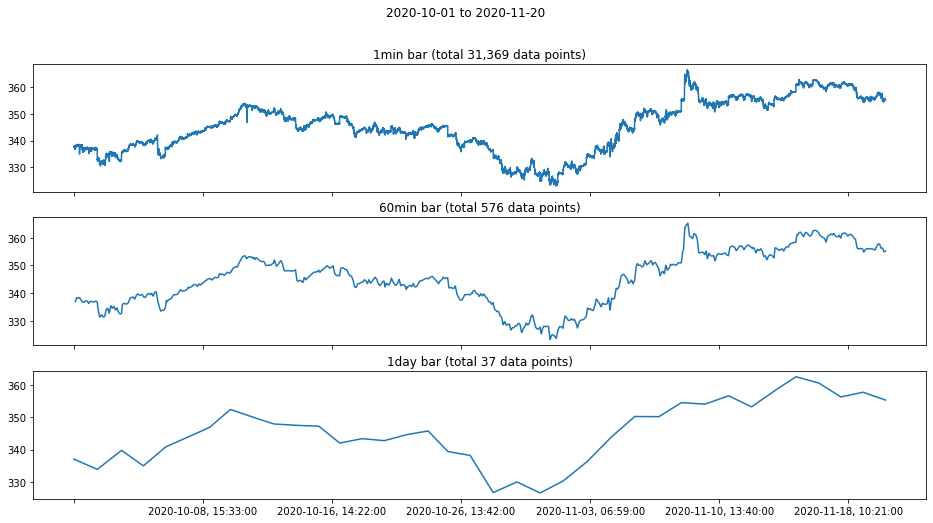

In [30]:
fig, ax = plt.subplots(3,1, figsize=(16,8), sharex=True)
dates = df.index
ax[0].xaxis.set_major_formatter(FuncFormatter(
    lambda x, pos: dates[int(round(x))].strftime('%Y-%m-%d, %H:%M:%S') if 0<int(round(x))<len(dates) else ''))
fig.suptitle(f'{dates[0].date()} to {dates[-1].date()}')
for i,(name,ts,) in enumerate(df.items()):
    ax[i].set_title(f'{name} (total {len(ts.dropna()):,.0f} data points)')
    ts = ts.reindex(dates).reset_index(drop=True)
    ax[i].plot(ts.index, ts.interpolate(), label=name)